In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("dark")
from time import time

train = pd.read_csv('data/train.csv', index_col=None)

# stats_fp = [np.mean, np.std]
stats_fp = [np.mean]

T1_V4, T1_V7
T1_V5, T1_V7
T1_V11, T1_V7
T1_V15, T1_V7
Time 1.39344 sec


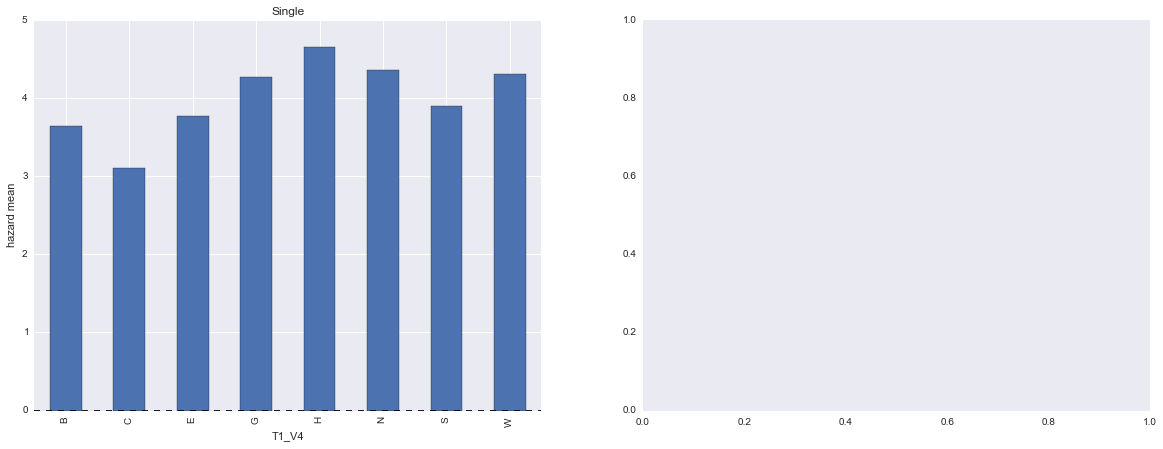

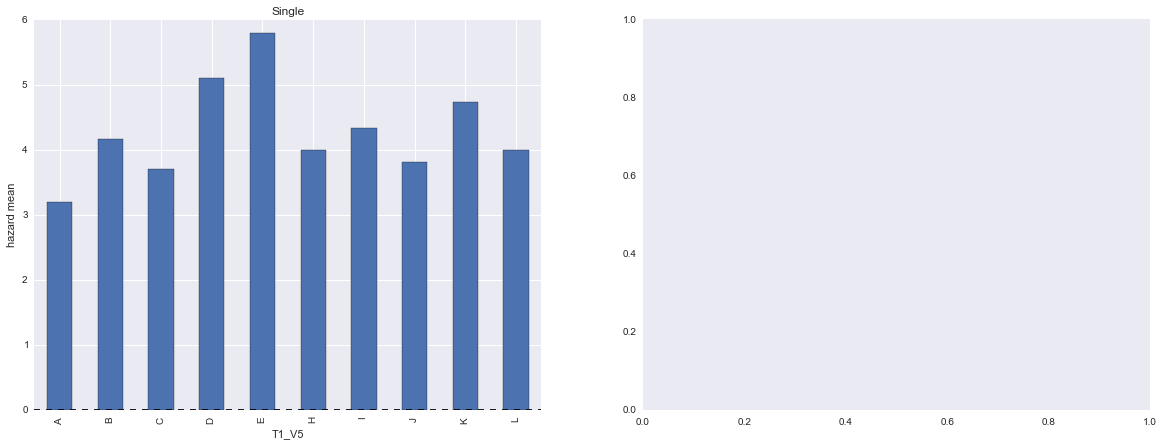

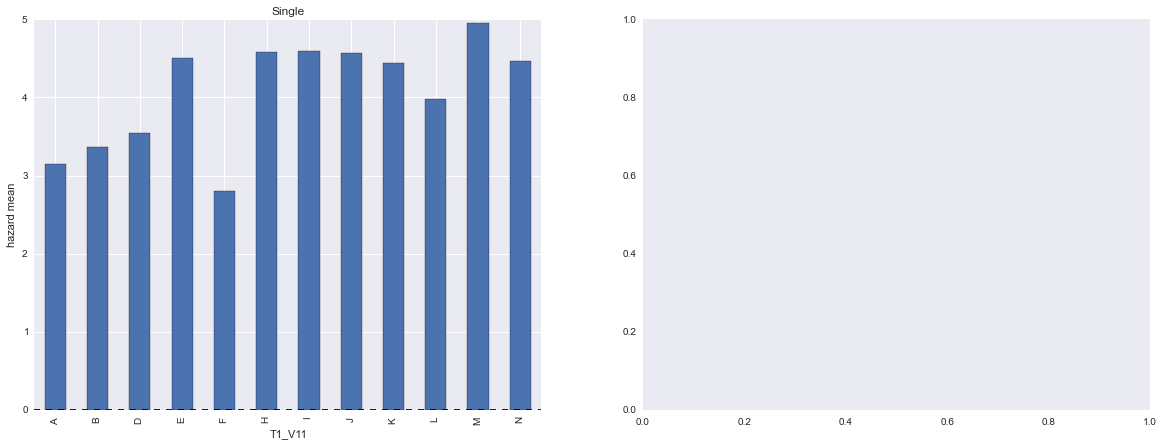

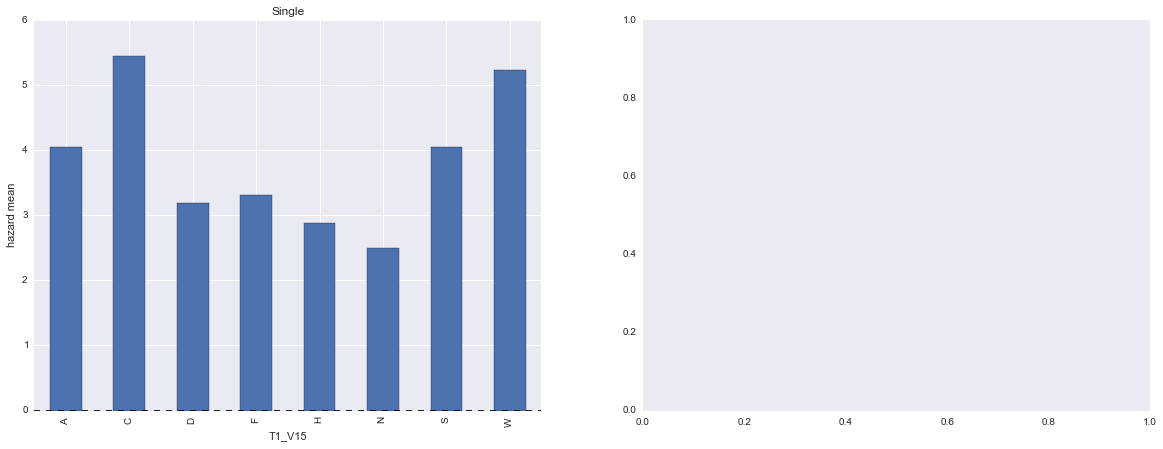

In [106]:
# feats1 = ['T2_V3']
# feats2 = ['T1_V7']

# feats1 = ['T1_V10', 'T1_V13', 'T2_V7', 'T2_V10']
# feats2 = ['T2_V7']
feats2 = ['T1_V7']
feats1 = ['T1_V4', 'T1_V5', 'T1_V11', 'T1_V15']

drop_cols = ['T1_V10', 'T1_V13', 'T2_V7', 'T2_V10']

tic = time()
# for feat1 in train.select_dtypes(include=['object']).columns:
#     for feat2 in train.select_dtypes(include=['object']).columns:

for feat1 in feats1:
    for feat2 in feats2:
        
        if feat2 == feat1:
            continue
        print('{0}, {1}'.format(feat1,feat2))
        for i, fp in enumerate(stats_fp):

            stats_df1 = train.groupby([feat1])['Hazard'].apply(lambda x: fp(x)).\
                reset_index().rename(columns={'Hazard': feat1 + '_' + stats_fp[0].__name__})
            stats_df2 = train.groupby([feat1, feat2])['Hazard'].apply(lambda x: fp(x)).\
                reset_index().rename(columns={'Hazard': feat1 + '_x_' + feat2 + '_' + stats_fp[0].__name__})

            train = train.reset_index().merge(stats_df2, how='left').set_index('index')
            train = train.reset_index().merge(stats_df1, how='left').set_index('index')

            m = train.groupby([feat1])['Hazard'].mean()
            m2 = train.groupby([feat1, feat2])['Hazard'].mean()

            f, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(20, 7))

            m.plot(kind='bar', subplots=True, ax=ax1)
            ax1.set_title('Single')
            ax1.set_ylabel('hazard mean')
            try:
                im2_data = np.array(m2).reshape([len(ii) for ii in m2.index.levels])
                im2 = ax2.imshow(im2_data, interpolation='None', aspect='auto',
                           extent=[0,len(m2.index.levels[1])/2,len(m2.index.levels[0]),0],
    #                             cmap='cubehelix_r'
                                )
                ax2.set_yticklabels(list(m2.index.levels[0]))
                ax2.set_xticklabels(list(m2.index.levels[1]))
                ax2.set_ylabel(m2.index.names[0])
                ax2.set_xlabel(m2.index.names[1])
    #             m2.plot(kind='bar',subplots=True, ax=ax2)
                ax2.set_title('Interaction')
                plt.colorbar(im2, ax=ax2)
    #             plt.xticks(rotation=0)
    #             plt.gcf().savefig('feat_interaction.png')
            except:
                pass
toc= time() - tic
print 'Time %g sec' % toc

# print(train.head())

In [ ]:
col = 'T2_V13'

In [59]:
tform_dict = {
    'T1_V1': lambda x: x,
    'T1_V2': lambda x: x,
    'T1_V3': lambda x: np.sqrt(x-5./8)
    'T1_V4': BCEGH->ordinal poisson cat | NSW exceptions,
    'T1_V5': ABCDE->one dist | HIJKL>another,
    'T1_V6': YN binary,
    'T1_V7': ABCD cat,
    'T1_V8': ABCD cat,
    'T1_V9': ordinal normal cat,
    'T1_V10': lambda x: x,
    'T1_V11': not sure if ordinal cat or just cat,
    'T1_V12': ABCD cat,
    'T1_V13': lambda x: x,
    'T1_V14': lambda x: x,
    'T1_V15': ACDFH one dist | NSW exceptions,
    'T1_V16': not sure if ordinal cat or just cat,
    'T1_V17': YN binary,
    'T2_V1': box,
    'T2_V2': poisson?,
    'T2_V3': YN,
    'T2_V4': lambda x: x,
    'T2_V5': ABCDEF ordinal cat,
    'T2_V6': poisson?,
    'T2_V7': log?,
    'T2_V8': lambda x: x,
    'T2_V9': lambda x: x,
    'T2_V10': lambda x: x,
    'T2_V11': YN,
    'T2_V12': YN,
    'T2_V13': ABCDE ordinal?,
    'T2_V14': ordinal poisson?,
    'T2_V15': heavy tailed -> log???,
}

print train.columns

Index([u'Id', u'Hazard', u'T1_V1', u'T1_V2', u'T1_V3', u'T1_V4', u'T1_V5', u'T1_V6', u'T1_V7', u'T1_V8', u'T1_V9', u'T1_V10', u'T1_V11', u'T1_V12', u'T1_V13', u'T1_V14', u'T1_V15', u'T1_V16', u'T1_V17', u'T2_V1', u'T2_V2', u'T2_V3', u'T2_V4', u'T2_V5', u'T2_V6', u'T2_V7', u'T2_V8', u'T2_V9', u'T2_V10', u'T2_V11', u'T2_V12', u'T2_V13', u'T2_V14', u'T2_V15'], dtype='object')


[0 1 2 3 4]


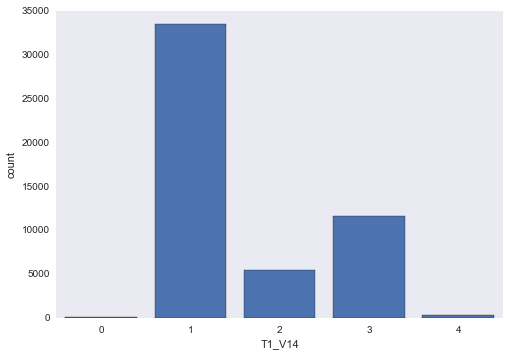

In [76]:
from transformers import *

# tform = lambda x: BoxCoxTformer().fit_transform(x)
# tform = lambda x: np.sqrt(x-5./8)
tform = lambda x: x

col = 'T1_V14'
q = tform(np.unique(train[col]))
print q

# sns.kdeplot(tform(train[col]), bw=0.2)
# plt.hist(tform(train[col]), bins=6)
sns.barplot(tform(train[col]))

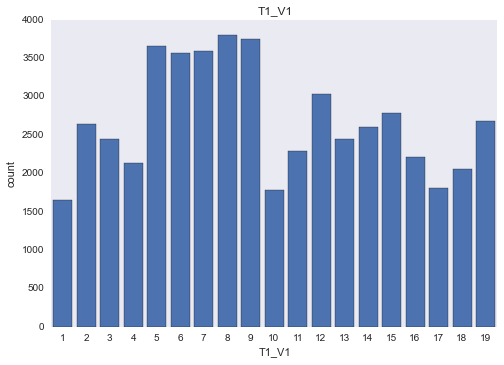

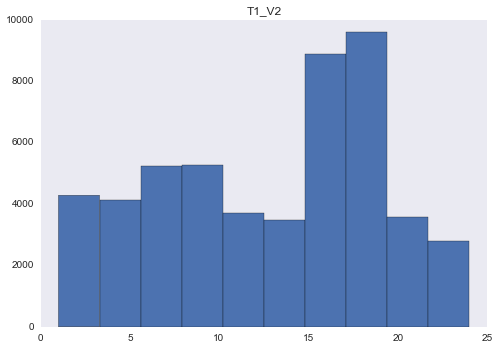

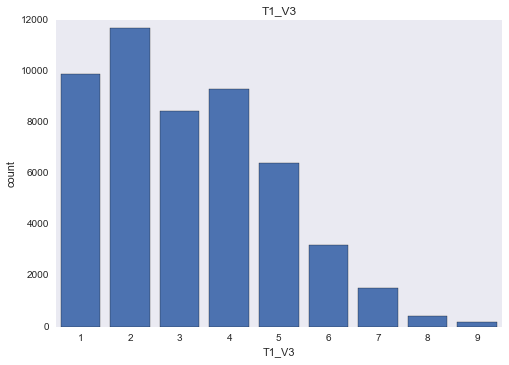

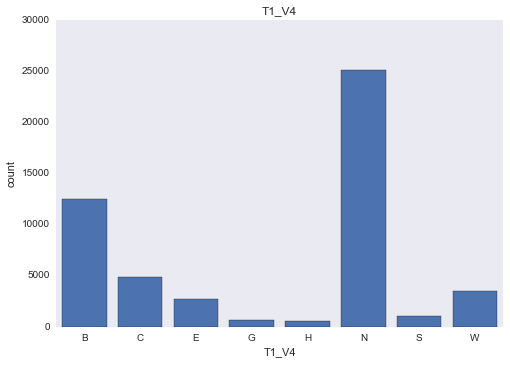

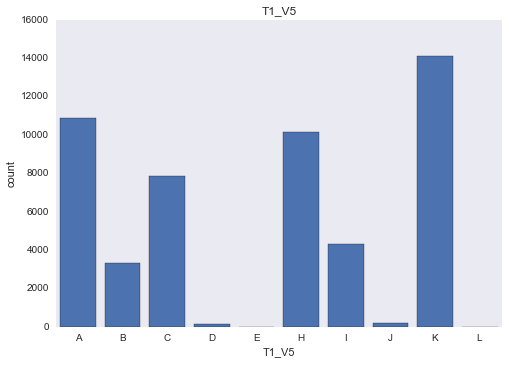

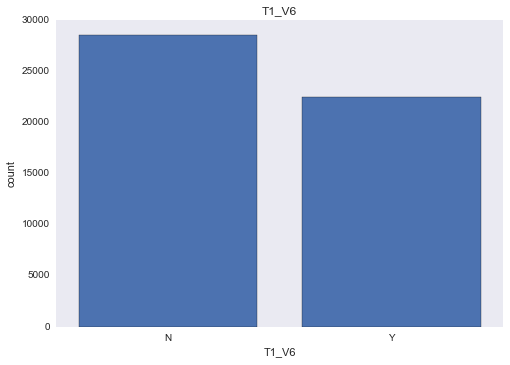

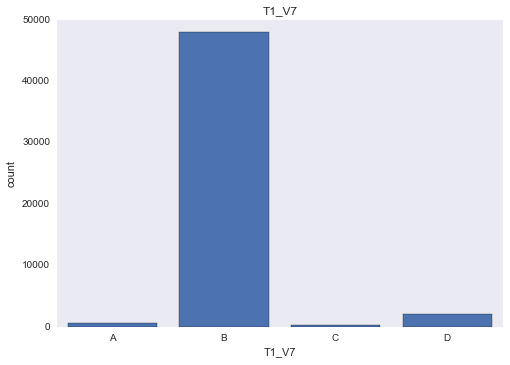

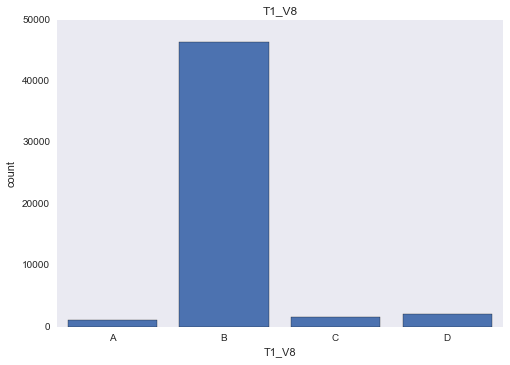

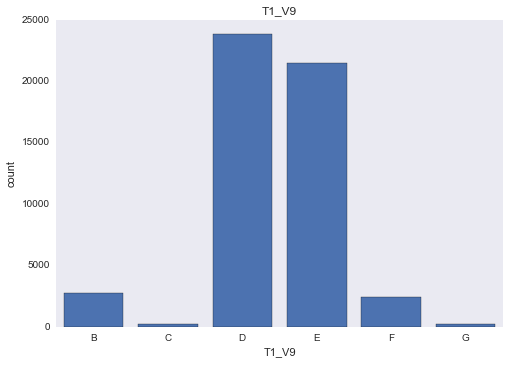

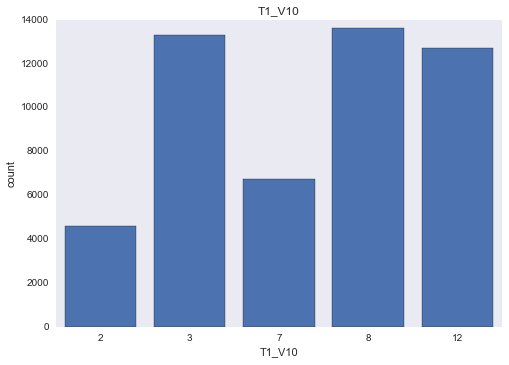

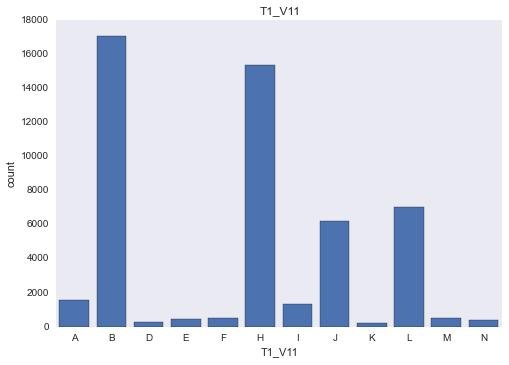

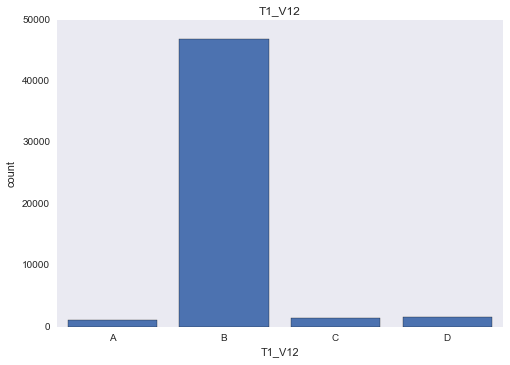

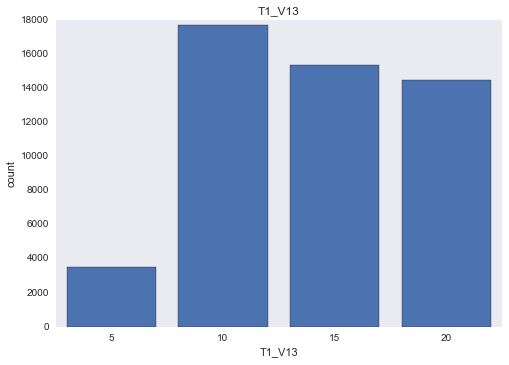

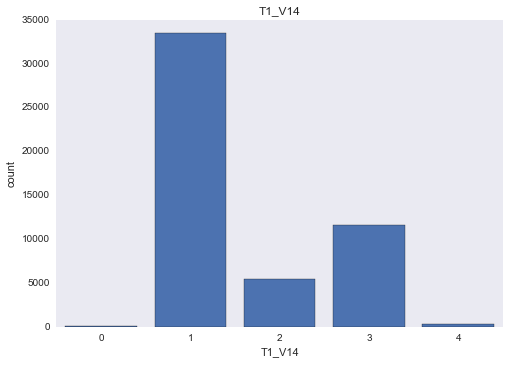

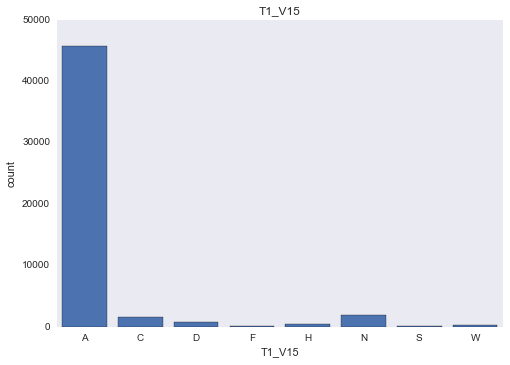

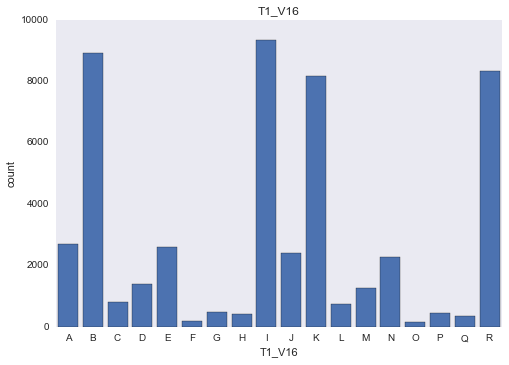

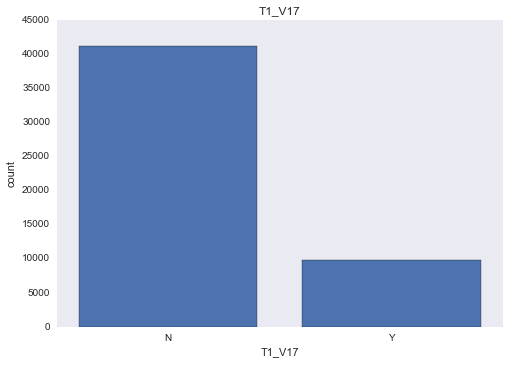

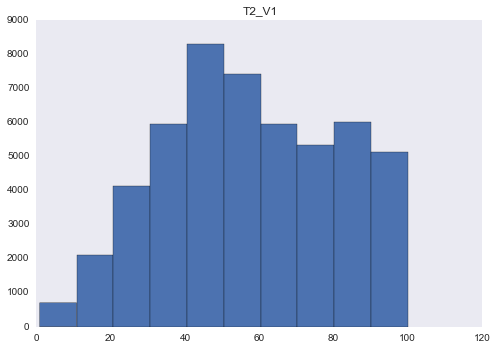

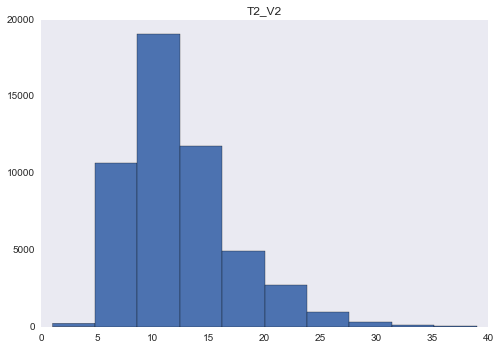

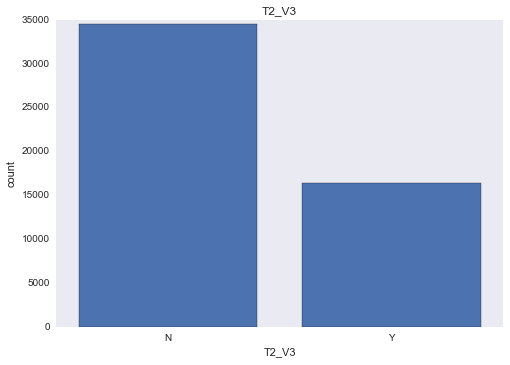

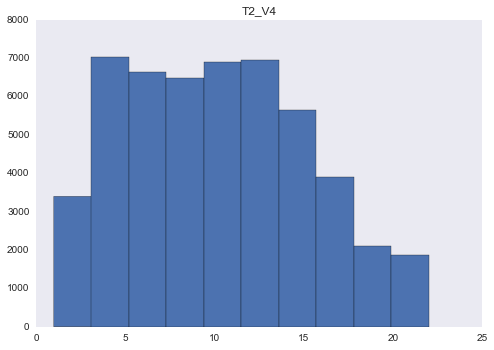

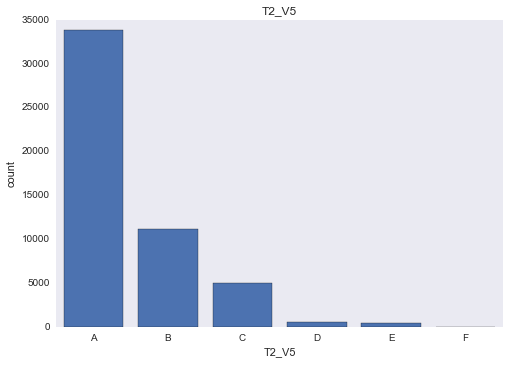

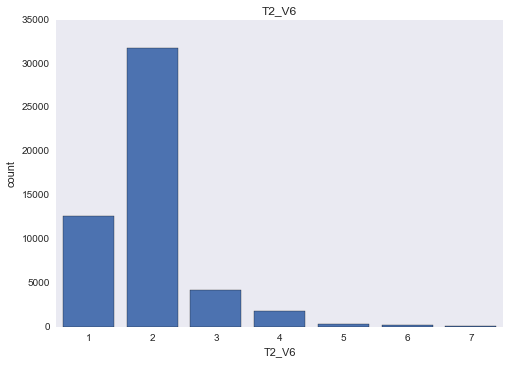

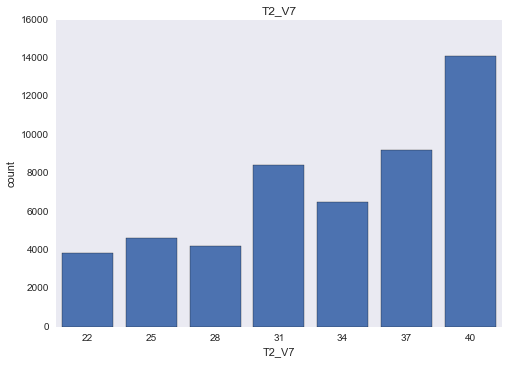

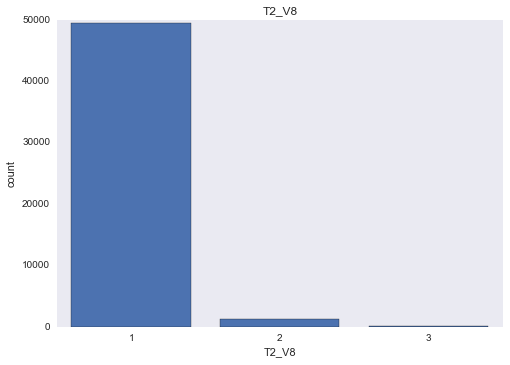

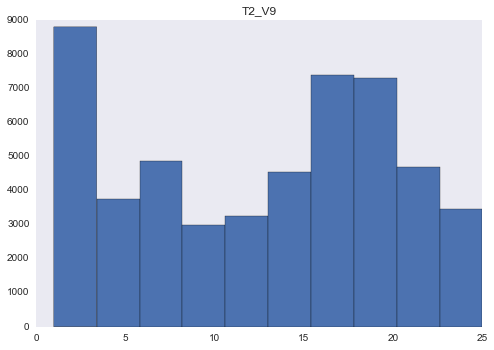

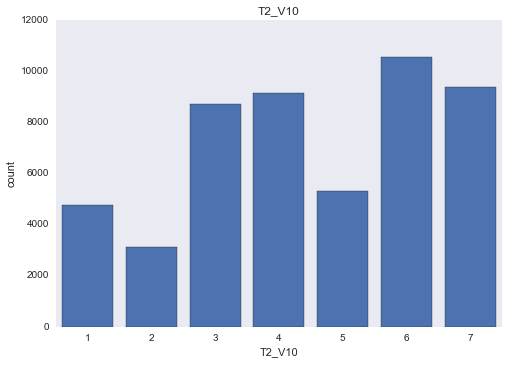

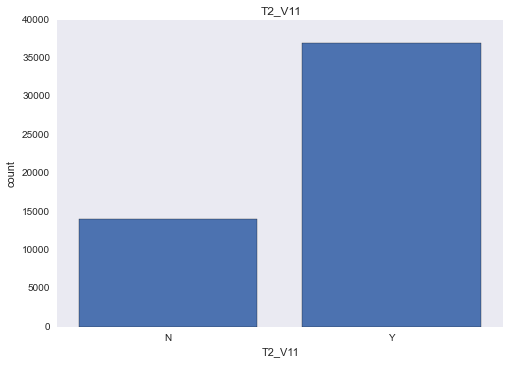

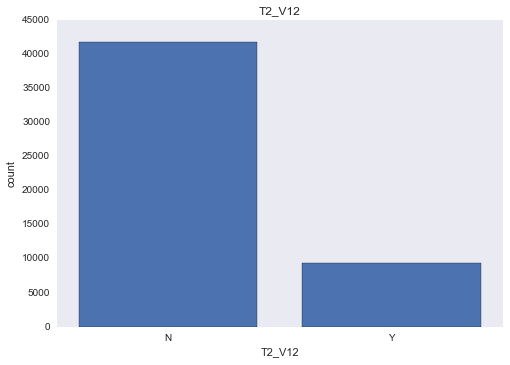

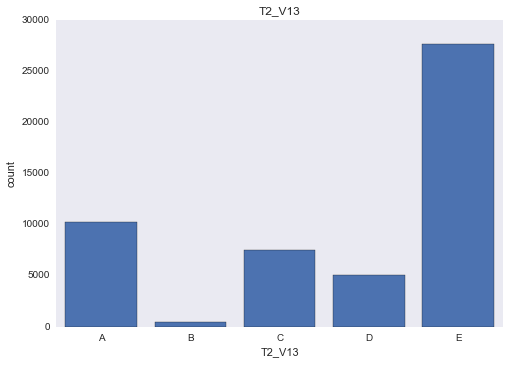

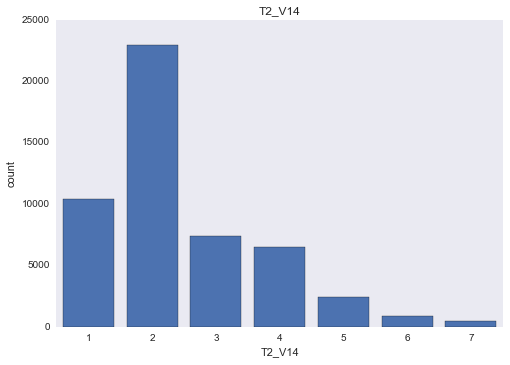

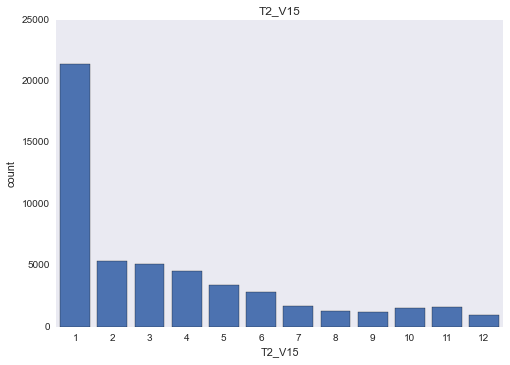

In [86]:
for col in train.columns[2:]:
    u = np.unique(train[col])
    plt.figure()
    if len(u) < 20:
        sns.barplot(train[col])
    else:
#         sns.kdeplot(train[col])
        plt.hist(train[col])
    plt.title(col)